# Effect of LSD on brain states during music experience (8 states) #

This notebook is used for analysis of the effect of LSD on brain states during music experience. 

We calculate states' measures:
1) fractional occupancy 
2) dwell time 
3) transition probability 

Then, for each of these measures we perform KS-tests to check if variables have a normal distirubtion. If so, we use paired t-test for related samples to test out hypothesis, otherise we use permutation non-parametric test.

Number of states = 8

**Last update:** 04.08.2022

### Step 0: Loading libraries ####

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from nilearn import plotting
from nilearn.plotting import plot_matrix
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, kstest, norm
%matplotlib inline
!pip install mlxtend 
from mlxtend.evaluate import permutation_test

/home/iga/miniconda3/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


### Step 1: Loading data ####

In [2]:
#Loading all data
bs_all = np.load('data/fixed_brain_states_reshaped.npy', allow_pickle = True).item()

#Loading data for each session (placebo / LSD) and run (rest 1 / music/ rest 2)
bs_plcb_run1 = bs_all['PLCB']['run_1']
bs_plcb_run2 = bs_all['PLCB']['run_2']
bs_plcb_run3 = bs_all['PLCB']['run_3']

bs_lsd_run1 = bs_all['LSD']['run_1']
bs_lsd_run2 = bs_all['LSD']['run_2']
bs_lsd_run3 = bs_all['LSD']['run_3']

In [3]:
bs_plcb_run1.shape

(13, 15, 217)

### Step 2: Creating a fractional occupancy function ####

In [4]:
def fractional_occupancy(vector):
    
    ''' 
    This function calculates fractional occupancy (percentage of timepoints in each run classified as a particular state) for each
    subject, session/run and task.
    
    Args:
        vector: 3D array in a size of:  n_subjects x n_sessions/n_runs x timeseries_length (ndarray)
        
    Return:
        fo: calculated fractional occupancy (int)
            
    '''
    
    fo = (np.unique(vector, return_counts=True)[1]/bs_vector.shape[1])*100 # calculating fractional occupancy
    
    return(fo)

### Step 3: Creating a dwell time function ####

In [5]:
def dwell_time(vector, label):
    
    """
    This function calculates the mean length of consecutives timepoints classified as a particular state
    
    Args:
        vector: list of labeling (e.g. from clustering)
        label: label with dwell time to calculate
 
    Return:
        dwell_time : the mean length of consecutives timepoints classified with particuar label
    """
    
    import numpy as np
    from itertools import groupby

    answer = []

    for key, iter in groupby(vector):
        answer.append((key, len(list(iter))))

    dwell_time = np.mean([x[1] for x in answer if x[0]==label])
    
    return(dwell_time)

### Step 4: Calculating fractional occupacy and dwell time for run 1 (resting state) ###

In [6]:
#Number of states
states_no = 8

#Organising data
sessions = {'PLCB': bs_plcb_run1[states_no-2,:,:], 'LSD': bs_lsd_run1[states_no-2,:,:]}
bs_measures_run1 = pd.DataFrame()

#Iterating over subjects, sessions, run and states
for ses, bs_vector in sessions.items():
    for sub in range(bs_vector.shape[0]):
        vector = bs_vector[sub, :]
        frac_occ = fractional_occupancy(vector) # calculating fractional occupancy
        for state in range(states_no):
            bs_measures_run1 = pd.concat([bs_measures_run1, pd.DataFrame({"Subject": sub,
                                                                "Session": ses,
                                                                "Run": 1,
                                                                "State": state+1,
                                                                "Fractional occupancy (%)": frac_occ[state],
                                                                "Dwell time (s)": dwell_time(vector,state) * 2 #multiplicate * TR (repetition time)
                                                                }, 
                                                                index=[0])], 
                                              axis=0)

### Step 5: Calculating fractional occupacy and dwell time for run 2 (resting state with music) ####

In [7]:
#Organising data
sessions = {'PLCB': bs_plcb_run2[states_no-2,:,:], 'LSD': bs_lsd_run2[states_no-2,:,:]}
bs_measures_run2 = pd.DataFrame()


#Iterating over subjects, sessions, run and states
for ses, bs_vector in sessions.items():
    for sub in range(bs_vector.shape[0]):
        vector = bs_vector[sub, :]
        frac_occ = fractional_occupancy(vector) # calculating fractional occupancy
        for state in range(states_no):
            bs_measures_run2 = pd.concat([bs_measures_run2, pd.DataFrame({"Subject": sub,
                                                                "Session": ses,
                                                                "Run": 2,
                                                                "State": state+1,
                                                                "Fractional occupancy (%)": frac_occ[state],
                                                                "Dwell time (s)": dwell_time(vector,state) * 2 #multiplicate * TR (repetition time)
                                                                }, 
                                                                index=[0])], 
                                              axis=0)

### Step 6: Calculating fractional occupacy and dwell time for run 3 (resting state) ####

In [8]:
#Organising data
sessions = {'PLCB': bs_plcb_run3[states_no-2,:,:], 'LSD': bs_lsd_run3[states_no-2,:,:]}
bs_measures_run3 = pd.DataFrame()


#Iterating over subjects, sessions, run and states
for ses, bs_vector in sessions.items():
    for sub in range(bs_vector.shape[0]):
        vector = bs_vector[sub, :]
        frac_occ = fractional_occupancy(vector) # calculating fractional occupancy
        for state in range(states_no):
            bs_measures_run3 = pd.concat([bs_measures_run3, pd.DataFrame({"Subject": sub,
                                                                "Session": ses,
                                                                "Run": 3,
                                                                "State": state+1,
                                                                "Fractional occupancy (%)": frac_occ[state],
                                                                "Dwell time (s)": dwell_time(vector,state) * 2 #multiplicate * TR (repetition time)
                                                                }, 
                                                                index=[0])], 
                                              axis=0)

### Step 7: KS-tests ####

In [9]:
#Selecting data from the sessions
plcb_run1 = bs_measures_run1[bs_measures_run1['Session'] == "PLCB"]
lsd_run1 = bs_measures_run1[bs_measures_run1['Session'] == "LSD"]

plcb_run2 = bs_measures_run2[bs_measures_run2['Session'] == "PLCB"]
lsd_run2 = bs_measures_run2[bs_measures_run2['Session'] == "LSD"]

plcb_run3 = bs_measures_run3[bs_measures_run3['Session'] == "PLCB"]
lsd_run3 = bs_measures_run3[bs_measures_run3['Session'] == "LSD"]

In [10]:
#Selecting the measures from run 1
plcb_fo_r1 = np.array(plcb_run1['Fractional occupancy (%)'])
plcb_dt_r1 = np.array(plcb_run1['Dwell time (s)'])
lsd_fo_r1 = np.array(lsd_run1['Fractional occupancy (%)'])
lsd_dt_r1 = np.array(lsd_run1['Dwell time (s)'])

#Selecting the measures from run 2
plcb_fo_r2 = np.array(plcb_run2['Fractional occupancy (%)'])
plcb_dt_r2 = np.array(plcb_run2['Dwell time (s)'])
lsd_fo_r2 = np.array(lsd_run2['Fractional occupancy (%)'])
lsd_dt_r2 = np.array(lsd_run2['Dwell time (s)'])

#Selecting the measures from run 3
plcb_fo_r3 = np.array(plcb_run3['Fractional occupancy (%)'])
plcb_dt_r3 = np.array(plcb_run3['Dwell time (s)'])
lsd_fo_r3 = np.array(lsd_run3['Fractional occupancy (%)'])
lsd_dt_r3 = np.array(lsd_run3['Dwell time (s)'])

#### Step 7.1: KS-test, fractional occupancy, placebo, run 1 

KS-test for fractional occupancy, placebo, run 1: statistics 0.057664600644835695, p-value 0.7979985727404588


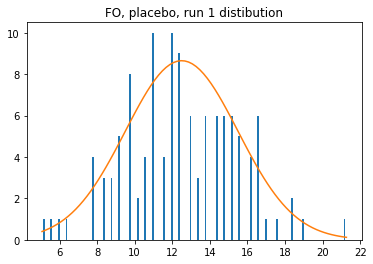

In [11]:
loc, scale = norm.fit(plcb_fo_r1)
n = norm(loc=loc, scale=scale)
stat, pval = kstest(plcb_fo_r1, n.cdf)
print(f'KS-test for fractional occupancy, placebo, run 1: statistics {stat}, p-value {pval}')

plt.hist(plcb_fo_r1, bins=np.arange(plcb_fo_r1.min(), plcb_fo_r1.max()+0.2, 0.2), rwidth=0.5)
x = np.arange(plcb_fo_r1.min(), plcb_fo_r1.max()+0.2, 0.2)
plt.plot(x, 65*n.pdf(x))
plt.title('FO, placebo, run 1 distibution')
plt.show()

#### Step 7.2: KS-test, dwell time, placebo run 1

KS-test for dwell time, placebo, run 1: statistics 0.061474800541950536, p-value 0.7312238226579117


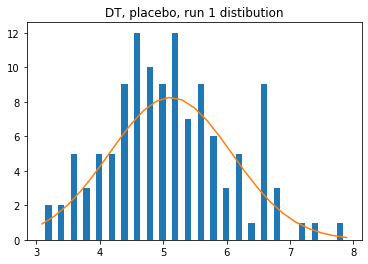

In [12]:
loc, scale = norm.fit(plcb_dt_r1)
n = norm(loc=loc, scale=scale)
stat, pval = kstest(plcb_dt_r1, n.cdf)
print(f'KS-test for dwell time, placebo, run 1: statistics {stat}, p-value {pval}')

plt.hist(plcb_dt_r1, bins=np.arange(plcb_dt_r1.min(), plcb_dt_r1.max()+0.2, 0.2), rwidth=0.5)
x = np.arange(plcb_dt_r1.min(), plcb_dt_r1.max()+0.2, 0.2)
plt.plot(x, 20*n.pdf(x))
plt.title('DT, placebo, run 1 distibution')
plt.show()

#### Step 7.3: KS-test, fractional occupancy, LSD run 1

KS-test for fractional occupancy, LSD, run 1: statistics 0.053339632957411676, p-value 0.8660604817028268


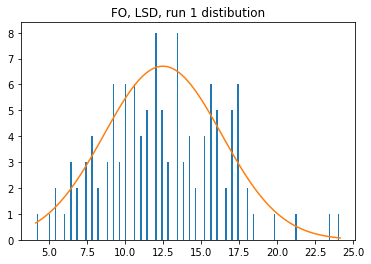

In [13]:
loc, scale = norm.fit(lsd_fo_r1)
n = norm(loc=loc, scale=scale)
stat, pval = kstest(lsd_fo_r1, n.cdf)
print(f'KS-test for fractional occupancy, LSD, run 1: statistics {stat}, p-value {pval}')

plt.hist(lsd_fo_r1, bins=np.arange(lsd_fo_r1.min(), lsd_fo_r1.max()+0.2, 0.2), rwidth=0.5)
x = np.arange(lsd_fo_r1.min(), lsd_fo_r1.max()+0.2, 0.2)
plt.plot(x, 65*n.pdf(x))
plt.title('FO, LSD, run 1 distibution')
plt.show()

#### Step 7.4: KS-test, dwell time, LSD run 1

KS-test for dwell time, LSD, run 1: statistics 0.09916474816128679, p-value 0.17646776529662295


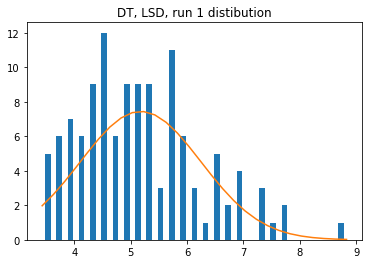

In [14]:
loc, scale = norm.fit(lsd_dt_r1)
n = norm(loc=loc, scale=scale)
stat, pval = kstest(lsd_dt_r1, n.cdf)
print(f'KS-test for dwell time, LSD, run 1: statistics {stat}, p-value {pval}')

plt.hist(lsd_dt_r1, bins=np.arange(lsd_dt_r1.min(), lsd_dt_r1.max()+0.2, 0.2), rwidth=0.5)
x = np.arange(lsd_dt_r1.min(), lsd_dt_r1.max()+0.2, 0.2)
plt.plot(x, 20*n.pdf(x))
plt.title('DT, LSD, run 1 distibution')
plt.show()

***************

#### Step 7.5: KS-test, fractional occupancy, placebo run 2

KS-test for fractional occupancy, placebo, run 2: statistics 0.08077007173379341, p-value 0.5315682727844724


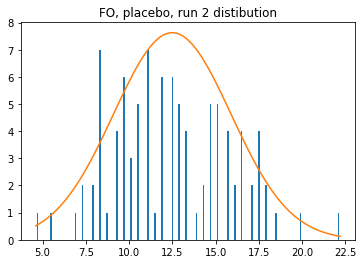

In [15]:
loc, scale = norm.fit(plcb_fo_r2)
n = norm(loc=loc, scale=scale)
stat, pval = kstest(plcb_fo_r2, n.cdf)
print(f'KS-test for fractional occupancy, placebo, run 2: statistics {stat}, p-value {pval}')

plt.hist(plcb_fo_r2, bins=np.arange(plcb_fo_r2.min(), plcb_fo_r2.max()+0.2, 0.2), rwidth=0.5)
x = np.arange(plcb_fo_r2.min(), plcb_fo_r2.max()+0.2, 0.2)
plt.plot(x, 65*n.pdf(x))
plt.title('FO, placebo, run 2 distibution')
plt.show()

#### Step 7.6: KS-test, dwell time, placebo run 2

KS-test for dwell time, placebo, run 2: statistics 0.09961368446458352, p-value 0.2777735181694284


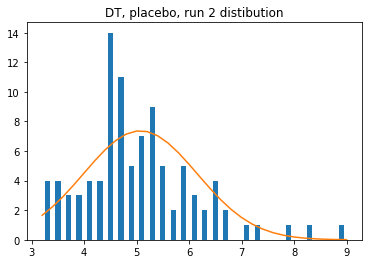

In [16]:
loc, scale = norm.fit(plcb_dt_r2)
n = norm(loc=loc, scale=scale)
stat, pval = kstest(plcb_dt_r2, n.cdf)
print(f'KS-test for dwell time, placebo, run 2: statistics {stat}, p-value {pval}')

plt.hist(plcb_dt_r2, bins=np.arange(plcb_dt_r2.min(), plcb_dt_r2.max()+0.2, 0.2), rwidth=0.5)
x = np.arange(plcb_dt_r2.min(), plcb_dt_r2.max()+0.2, 0.2)
plt.plot(x, 20*n.pdf(x))
plt.title('DT, placebo, run 2 distibution')
plt.show()

#### Step 7.7: KS-test, fractional occupancy, LSD run 2

KS-test for fractional occupancy, LSD, run 2: statistics 0.07107068909805944, p-value 0.6902929166063732


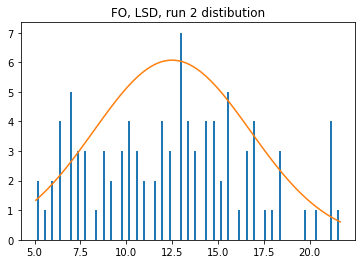

In [17]:
loc, scale = norm.fit(lsd_fo_r2)
n = norm(loc=loc, scale=scale)
stat, pval = kstest(lsd_fo_r2, n.cdf)
print(f'KS-test for fractional occupancy, LSD, run 2: statistics {stat}, p-value {pval}')

plt.hist(lsd_fo_r2, bins=np.arange(lsd_fo_r2.min(), lsd_fo_r2.max()+0.2, 0.2), rwidth=0.5)
x = np.arange(lsd_fo_r2.min(), lsd_fo_r2.max()+0.2, 0.2)
plt.plot(x, 65*n.pdf(x))
plt.title('FO, LSD, run 2 distibution')
plt.show()

#### Step 7.8: KS-test, dwell time, LSD run 2

KS-test for dwell time, LSD, run 2: statistics 0.09633063496780508, p-value 0.3146803187663218


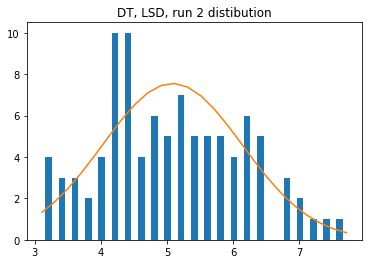

In [18]:
loc, scale = norm.fit(lsd_dt_r2)
n = norm(loc=loc, scale=scale)
stat, pval = kstest(lsd_dt_r2, n.cdf)
print(f'KS-test for dwell time, LSD, run 2: statistics {stat}, p-value {pval}')

plt.hist(lsd_dt_r2, bins=np.arange(lsd_dt_r2.min(), lsd_dt_r2.max()+0.2, 0.2), rwidth=0.5)
x = np.arange(lsd_dt_r2.min(), lsd_dt_r2.max()+0.2, 0.2)
plt.plot(x, 20*n.pdf(x))
plt.title('DT, LSD, run 2 distibution')
plt.show()

******************

#### Step 7.9: KS-test, fractional occupancy, placebo run 3

KS-test for fractional occupancy, placebo, run 3: statistics 0.1023028365614147, p-value 0.15128001014866654


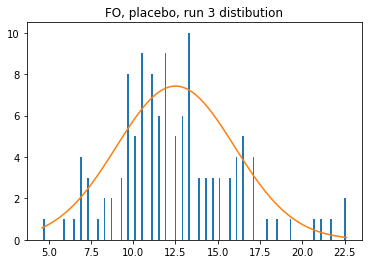

In [19]:
loc, scale = norm.fit(plcb_fo_r3)
n = norm(loc=loc, scale=scale)
stat, pval = kstest(plcb_fo_r3, n.cdf)
print(f'KS-test for fractional occupancy, placebo, run 3: statistics {stat}, p-value {pval}')

plt.hist(plcb_fo_r3, bins=np.arange(plcb_fo_r3.min(), plcb_fo_r3.max()+0.2, 0.2), rwidth=0.5)
x = np.arange(plcb_fo_r3.min(), plcb_fo_r3.max()+0.2, 0.2)
plt.plot(x, 65*n.pdf(x))
plt.title('FO, placebo, run 3 distibution')
plt.show()

#### Step 7.10: KS-test, dwell time, placebo run 3

KS-test for dwell time, placebo, run 3: statistics 0.08586705283672713, p-value 0.32065229971882425


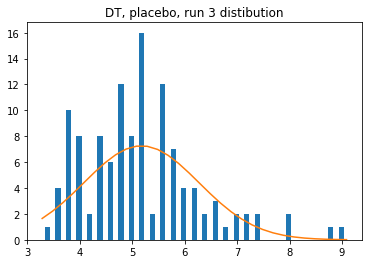

In [20]:
loc, scale = norm.fit(plcb_dt_r3)
n = norm(loc=loc, scale=scale)
stat, pval = kstest(plcb_dt_r3, n.cdf)
print(f'KS-test for dwell time, placebo, run 3: statistics {stat}, p-value {pval}')

plt.hist(plcb_dt_r3, bins=np.arange(plcb_dt_r3.min(), plcb_dt_r3.max()+0.2, 0.2), rwidth=0.5)
x = np.arange(plcb_dt_r3.min(), plcb_dt_r3.max()+0.2, 0.2)
plt.plot(x, 20*n.pdf(x))
plt.title('DT, placebo, run 3 distibution')
plt.show()

#### Step 7.11: KS-test, fractional occupancy, LSD run 3

KS-test for fractional occupancy, LSD, run 3: statistics 0.07019953410143409, p-value 0.5709324811911634


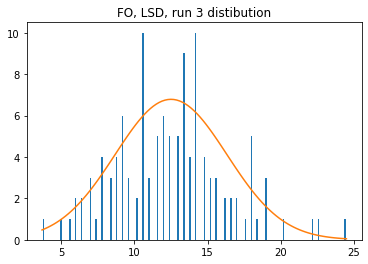

In [21]:
loc, scale = norm.fit(lsd_fo_r3)
n = norm(loc=loc, scale=scale)
stat, pval = kstest(lsd_fo_r3, n.cdf)
print(f'KS-test for fractional occupancy, LSD, run 3: statistics {stat}, p-value {pval}')

plt.hist(lsd_fo_r3, bins=np.arange(lsd_fo_r3.min(), lsd_fo_r3.max()+0.2, 0.2), rwidth=0.5)
x = np.arange(lsd_fo_r3.min(), lsd_fo_r3.max()+0.2, 0.2)
plt.plot(x, 65*n.pdf(x))
plt.title('FO, LSD, run 3 distibution')
plt.show()

#### Step 7.12: KS-test, dwell time, LSD run 3

KS-test for dwell time, LSD, run 3: statistics 0.06045161462387272, p-value 0.7495871171071146


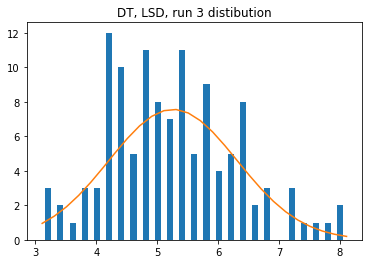

In [22]:
loc, scale = norm.fit(lsd_dt_r3)
n = norm(loc=loc, scale=scale)
stat, pval = kstest(lsd_dt_r3, n.cdf)
print(f'KS-test for dwell time, LSD, run 3: statistics {stat}, p-value {pval}')

plt.hist(lsd_dt_r3, bins=np.arange(lsd_dt_r3.min(), lsd_dt_r3.max()+0.2, 0.2), rwidth=0.5)
x = np.arange(lsd_dt_r3.min(), lsd_dt_r3.max()+0.2, 0.2)
plt.plot(x, 20*n.pdf(x))
plt.title('DT, LSD, run 3 distibution')
plt.show()

### Step 8: Merging and saving dataframes ###

In [23]:
#Selcting all dataframes
frames = [bs_measures_run1, bs_measures_run2, bs_measures_run3]

#Merging
df_merge_8 = pd.concat(frames)
df_merge_8

df_merge_8.to_csv(r'data/8_states/8_df_merge.csv', index = False)

In [24]:
df_merge_8

,Subject,Session,Run,State,Fractional occupancy (%),Dwell time (s)
0,0,PLCB,1,1,16.589862,5.142857
0,0,PLCB,1,2,9.677419,4.666667
0,0,PLCB,1,3,15.207373,5.500000
0,0,PLCB,1,4,8.294931,5.142857
0,0,PLCB,1,5,11.981567,5.777778
...,...,...,...,...,...,...
0,14,LSD,3,4,8.755760,5.428571
0,14,LSD,3,5,17.050691,7.400000
0,14,LSD,3,6,9.216590,5.714286
0,14,LSD,3,7,17.972350,6.500000


---------------------------------
## Analysis ##

### Step 9: Selecting data from 12 subjects from run 1 and run 2 ###

In [25]:
#Selecting subjects
data_crop_run1 = bs_measures_run1[(bs_measures_run1['Subject'] != 2) & (bs_measures_run1['Subject'] != 8) & (bs_measures_run1['Subject'] != 10)]

#Merging dataframes
frames_2 = [data_crop_run1, bs_measures_run2]
data_run1_2 = pd.concat(frames_2)

### Step 10: Plotting fractional occupancy for run 1 (resting state) and run 2 (music) ###

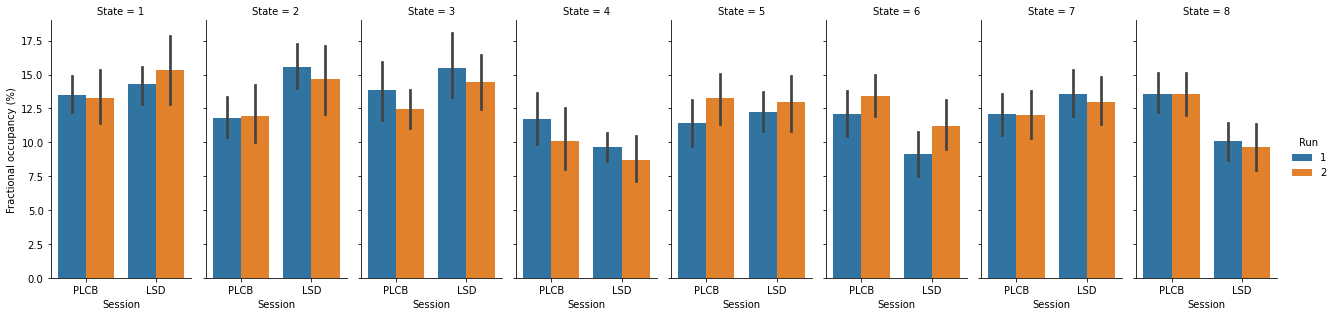

In [32]:
sns.catplot(x = 'Session', y = 'Fractional occupancy (%)', hue = 'Run', col = 'State', kind = 'bar', data = data_run1_2,  height=4.5, aspect=0.5)
plt.savefig('Figures/8_states/fo_run12.png', dpi=300, bbox_inches='tight')

### Step 11: Plotting dwell time for run 1 (resting state) and run 2 (music) ###

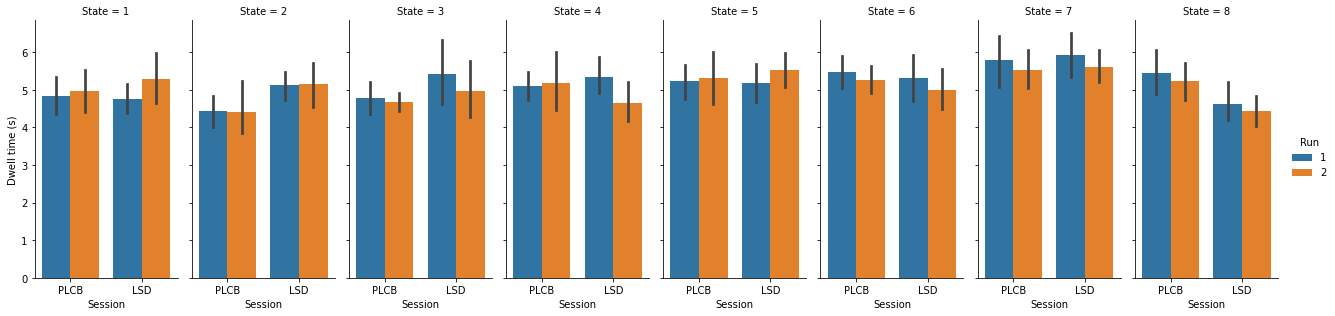

In [33]:
sns.catplot(x = 'Session', y = 'Dwell time (s)', hue = 'Run', col = 'State', kind = 'bar', data = data_run1_2,  height=4.5, aspect=0.5)
plt.savefig('Figures/8_states/dt_run12.png', dpi=300, bbox_inches='tight')

## **Fractional occupancy analysis** ##

### Step 12: Performing t-test for each state for fractional occupancy (run 1 vs run 2 for each session) ###

In [34]:
#Selecting states and sessions
sessions = ['PLCB', 'LSD']

iterator = np.arange(8) 

#Iterating over states and sessions
for i in iterator:
    for j in sessions:
        fo_state = data_run1_2[(data_run1_2['State'] == i+1) & (data_run1_2['Session'] == j)]
        fo_run1 = []
        fo_run2 = []
        for index, row in fo_state.iterrows():
            if row['Run'] == 1:
                fo_run1.append(row['Fractional occupancy (%)'])
            else:
                fo_run2.append(row['Fractional occupancy (%)'])
                
        stat_t, pval_t = ttest_rel(fo_run1, fo_run2) #Calculating paired t-test
        print(f'Paired T-test for state {i+1}, session {j} | statistics: {stat_t}, p-value: {pval_t}')
        print('')

Paired T-test for state 1, session PLCB | statistics: 0.18238636931024432, p-value: 0.8585973301439583

Paired T-test for state 1, session LSD | statistics: -0.8886283058055696, p-value: 0.39322028326967684

Paired T-test for state 2, session PLCB | statistics: -0.09509770544972813, p-value: 0.9259474913774688

Paired T-test for state 2, session LSD | statistics: 0.6236125413676229, p-value: 0.545596073854274

Paired T-test for state 3, session PLCB | statistics: 1.0382870159087605, p-value: 0.3214215340635237

Paired T-test for state 3, session LSD | statistics: 0.7716576689379441, p-value: 0.4565747021547035

Paired T-test for state 4, session PLCB | statistics: 1.6364804949839085, p-value: 0.13000187746677858

Paired T-test for state 4, session LSD | statistics: 1.1666690235761654, p-value: 0.2680143268871299

Paired T-test for state 5, session PLCB | statistics: -1.8309508328682542, p-value: 0.09430556976135313

Paired T-test for state 5, session LSD | statistics: -0.64018439966448

### Step 13: Performing t-test for each state for fractional occupancy (difference between run 2 and run 1) ###

In [35]:
#Iterating over states and sessions
for i in iterator:
    diff_list = []
    for j in sessions:
        fo_state = data_run1_2[(data_run1_2['State'] == i+1) & (data_run1_2['Session'] == j)]
        fo_run1 = []
        fo_run2 = []
        
        for index, row in fo_state.iterrows():
            if row['Run'] == 1:
                fo_run1.append(row['Fractional occupancy (%)'])
            else:
                fo_run2.append(row['Fractional occupancy (%)'])
                
        diff = np.array(fo_run2) - np.array(fo_run1) #Calculating the difference between run 2 and run 1
        diff_list.append(diff)
        
    stat_t, pval_t = ttest_rel(diff_list[0], diff_list[1]) #Calculating paired t-test
    print(f'Paired T-test for state {i+1} | statistics: {stat_t}, p-value: {pval_t}')
    print('')

Paired T-test for state 1 | statistics: -0.8893881244738179, p-value: 0.39282944933703423

Paired T-test for state 2 | statistics: 0.49929546715767936, p-value: 0.6274065129773339

Paired T-test for state 3 | statistics: -0.24810160044844082, p-value: 0.808626406843891

Paired T-test for state 4 | statistics: -0.6258242419819274, p-value: 0.5441966129135601

Paired T-test for state 5 | statistics: 0.6466479779970196, p-value: 0.5311208033675179

Paired T-test for state 6 | statistics: -0.5250745897567166, p-value: 0.6099511653467515

Paired T-test for state 7 | statistics: 0.3857093933653659, p-value: 0.7070669555579419

Paired T-test for state 8 | statistics: 0.31224717049854056, p-value: 0.7606919175896457



### Step 14: Performing t-test for run 2 for fractional occupancy (placebo vs LSD for each run) ###

In [36]:
#Selecting runs
runs = [2]

#Iterating over states and runs
for i in iterator:
    fo_plcb = []
    fo_lsd = []
    for j in runs:
        fo_run = data_run1_2[data_run1_2['Run'] == j]
        for index, row in fo_run.iterrows():
            if row['State'] == i+1:
                if row['Session'] == 'PLCB':
                    fo_plcb.append(row['Fractional occupancy (%)'])
                else:
                    fo_lsd.append(row['Fractional occupancy (%)'])
                    
        stat_t, pval_t = ttest_rel(fo_plcb, fo_lsd) #Calculating paired t-test
        print(f'Paired T-test for run {j}, state {i+1}| statistics: {stat_t}, p-value: {pval_t}')
        print('')

Paired T-test for run 2, state 1| statistics: -1.45822473551169, p-value: 0.1727320853120121

Paired T-test for run 2, state 2| statistics: -1.665972459991257, p-value: 0.12390932393353367

Paired T-test for run 2, state 3| statistics: -1.3983067114115686, p-value: 0.18957486505007473

Paired T-test for run 2, state 4| statistics: 1.0889749347523467, p-value: 0.2994474173276403

Paired T-test for run 2, state 5| statistics: 0.16454757047343943, p-value: 0.8722848375384318

Paired T-test for run 2, state 6| statistics: 1.6452613162988239, p-value: 0.1281607315328556

Paired T-test for run 2, state 7| statistics: -0.725351319971399, p-value: 0.48338252321007014

Paired T-test for run 2, state 8| statistics: 3.021935094102219, p-value: 0.011615483158455838



## **Dwell time analysis** ##

### Step 15: Performing t-test for each state for dwell time (run 1 vs run 2 for each session) ###

In [37]:
#Iterating over states and sessions
for i in iterator:
    for j in sessions:
        dt_state = data_run1_2[(data_run1_2['State'] == i+1) & (data_run1_2['Session'] == j)]
        dt_run1 = []
        dt_run2 = []
        for index, row in dt_state.iterrows():
            if row['Run'] == 1:
                dt_run1.append(row['Dwell time (s)'])
            else:
                dt_run2.append(row['Dwell time (s)'])
                
        stat_t, pval_t = ttest_rel(dt_run1, dt_run2) #Calculating paired t-test
        print(f'Paired T-test for state {i+1}, session {j} | statistics: {stat_t}, p-value: {pval_t}')
        print('')

Paired T-test for state 1, session PLCB | statistics: -0.6961001060985308, p-value: 0.5008097210115721

Paired T-test for state 1, session LSD | statistics: -1.147623132195428, p-value: 0.27547137380036274

Paired T-test for state 2, session PLCB | statistics: 0.06951168348545013, p-value: 0.9458298984526032

Paired T-test for state 2, session LSD | statistics: -0.12423913250534341, p-value: 0.9033671767295607

Paired T-test for state 3, session PLCB | statistics: 0.4728113548301181, p-value: 0.6455904234921459

Paired T-test for state 3, session LSD | statistics: 0.7840111484462515, p-value: 0.44958673192987675

Paired T-test for state 4, session PLCB | statistics: -0.23066478697194853, p-value: 0.8218091356627312

Paired T-test for state 4, session LSD | statistics: 1.957280663550193, p-value: 0.07616676311346468

Paired T-test for state 5, session PLCB | statistics: -0.33491813688471833, p-value: 0.7439864633476374

Paired T-test for state 5, session LSD | statistics: -1.09053605923

### Step 16: Performing t-test for each state for dwell time (difference between run 2 and run 1) ###

In [38]:
for i in iterator:
    diff_list = []
    for j in sessions:
        dt_state = data_run1_2[(data_run1_2['State'] == i+1) & (data_run1_2['Session'] == j)]
        dt_run1 = []
        dt_run2 = []
        for index, row in dt_state.iterrows():
            if row['Run'] == 1:
                dt_run1.append(row['Dwell time (s)'])
            else:
                dt_run2.append(row['Dwell time (s)'])
                
        diff = np.array(dt_run2) - np.array(dt_run1)
        diff_list.append(diff)
        
    stat_t, pval_t = ttest_rel(diff_list[0], diff_list[1]) #Calculating paired t-test
    print(f'Paired T-test for state {i+1} | statistics: {stat_t}, p-value: {pval_t}')
    print('')

Paired T-test for state 1 | statistics: -0.9298041811425676, p-value: 0.37242783231471177

Paired T-test for state 2 | statistics: -0.1415847034542964, p-value: 0.8899678001035438

Paired T-test for state 3 | statistics: 0.5307896364431764, p-value: 0.6061149625073867

Paired T-test for state 4 | statistics: 1.4208246998079197, p-value: 0.1830892596678088

Paired T-test for state 5 | statistics: -0.6169885029804163, p-value: 0.5497996170326821

Paired T-test for state 6 | statistics: 0.24725441398973047, p-value: 0.8092655097815816

Paired T-test for state 7 | statistics: 0.12129990539733441, p-value: 0.9056409552474851

Paired T-test for state 8 | statistics: -0.030200365795541077, p-value: 0.9764482389044532



### Step 17: Performing t-test for run 2 for dwell time (placebo vs LSD for each run) ###

In [39]:
#Iterating over states and runs
for i in iterator:
    dt_plcb = []
    dt_lsd = []
    dt_run = data_run1_2[data_run1_2['Run'] == 2]
    for index, row in dt_run.iterrows():
        if row['State'] == i+1:
            if row['Session'] == 'PLCB':
                dt_plcb.append(row['Dwell time (s)'])
            else:
                dt_lsd.append(row['Dwell time (s)'])
                    
    stat_t, pval_t = ttest_rel(dt_plcb, dt_lsd) #Calculating paired t-test
    print(f'Paired T-test for run {j}, state {i+1}| statistics: {stat_t}, p-value: {pval_t}')
    print('')

Paired T-test for run LSD, state 1| statistics: -0.6552736594838767, p-value: 0.525758147781587

Paired T-test for run LSD, state 2| statistics: -1.6405221211860945, p-value: 0.12915154887685454

Paired T-test for run LSD, state 3| statistics: -0.5912089582907415, p-value: 0.5663308695452618

Paired T-test for run LSD, state 4| statistics: 0.986557348819565, p-value: 0.345063201531536

Paired T-test for run LSD, state 5| statistics: -0.43760293086426943, p-value: 0.6701421596670842

Paired T-test for run LSD, state 6| statistics: 0.8168518323198114, p-value: 0.431348849487848

Paired T-test for run LSD, state 7| statistics: -0.19590101272081953, p-value: 0.848259643494639

Paired T-test for run LSD, state 8| statistics: 2.0352942688454356, p-value: 0.06664141624620207



## **Transition probability analysis** ##

### Step 18: Loading data ###

In [3]:
#Loading all data
bs_all = np.load('data/fixed_brain_states_reshaped.npy', allow_pickle = True).item() 

#Creating subjects filter
sub_filter = [True,True,False,True,True,True,True,True,False,True,False,True,True,True,True]

#Loading data for each session (placebo / LSD) and run (rest 1 / music )
bs_plcb_run1 = bs_all['PLCB']['run_1'][6,:,:]
bs_plcb_run1 = bs_plcb_run1[sub_filter]
bs_plcb_run2 = bs_all['PLCB']['run_2'][6,:,:]

bs_lsd_run1 = bs_all['LSD']['run_1'][6,:,:]
bs_lsd_run1 = bs_lsd_run1[sub_filter]
bs_lsd_run2 = bs_all['LSD']['run_2'][6,:,:]

### Step 19: Calculating transition probability for placebo session ###

In [4]:
states_no = 8
plcb_all = [bs_plcb_run1, bs_plcb_run2]
state_transitions_plcb = np.zeros((bs_plcb_run1.shape[0], 2, states_no, states_no))

for s, bs in enumerate(plcb_all):
    for sub in range(bs.shape[0]):   
            for i in range(states_no):
                for j in range(states_no):
                    count = 0
                    for l in range(bs.shape[1]-1):
                        if bs[sub, l] == i and bs[sub, l+1] == j:
                            count += 1
                            p = count/np.unique(bs[sub, :], return_counts=True)[1][i] #Calculating transition probability
                    state_transitions_plcb[sub, s, i, j] = p
                    
np.save('data/8_states/state_transitions_plcb_1.npy', state_transitions_plcb)

### Step 20: KS-test for transition probability for placebo session ###

#### Step 20.1: KS-test transition probability placebo session run 1 ####

KS-test for transition probability, placebo session, run 1: statistics 0.30263452048202427, p-value 6.686128599581951e-63


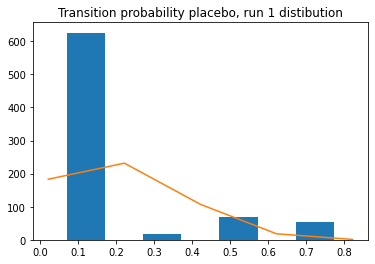

In [42]:
plcb_run1 = state_transitions_plcb[:,0,:,:]

p1_trans1 = np.concatenate(plcb_run1, axis = 0)
plcb1 = np.concatenate(p1_trans1, axis = 0)

p1_loc, p1_scale = norm.fit(plcb1)
n1 = norm(loc=p1_loc, scale=p1_scale)
p1_stat, p1_pval = kstest(plcb1, n1.cdf)
print(f'KS-test for transition probability, placebo session, run 1: statistics {p1_stat}, p-value {p1_pval}')

plt.hist(plcb1, bins=np.arange(plcb1.min(), plcb1.max()+0.2, 0.2), rwidth=0.5)
p1_x = np.arange(plcb1.min(), plcb1.max()+0.2, 0.2)
plt.plot(p1_x, 120*n1.pdf(p1_x))
plt.title('Transition probability placebo, run 1 distibution')
plt.show()

#### Step 20.2: KS-test transition probability placebo session run 2 ####

KS-test for transition probability, placebo session, run 2: statistics 0.2893418508003554, p-value 1.9814283719548554e-57


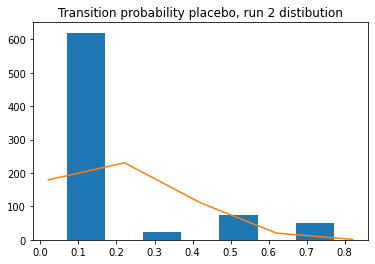

In [43]:
plcb_run2 = state_transitions_plcb[:,1,:,:]

p2_trans1 = np.concatenate(plcb_run2, axis = 0)
plcb2 = np.concatenate(p2_trans1, axis = 0)

p2_loc, p2_scale = norm.fit(plcb2)
n2 = norm(loc=p2_loc, scale=p2_scale)
p2_stat, p2_pval = kstest(plcb2, n2.cdf)
print(f'KS-test for transition probability, placebo session, run 2: statistics {p2_stat}, p-value {p2_pval}')

plt.hist(plcb2, bins=np.arange(plcb2.min(), plcb2.max()+0.2, 0.2), rwidth=0.5)
p2_x = np.arange(plcb2.min(), plcb2.max()+0.2, 0.2)
plt.plot(p2_x, 120*n2.pdf(p2_x))
plt.title('Transition probability placebo, run 2 distibution')
plt.show()

### Step 21: Performing permutation test for placebo session between run 1 and run 2 ###

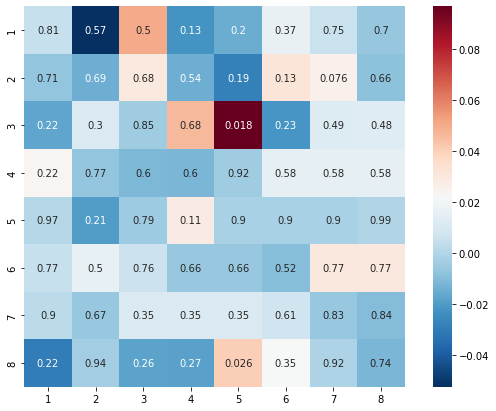

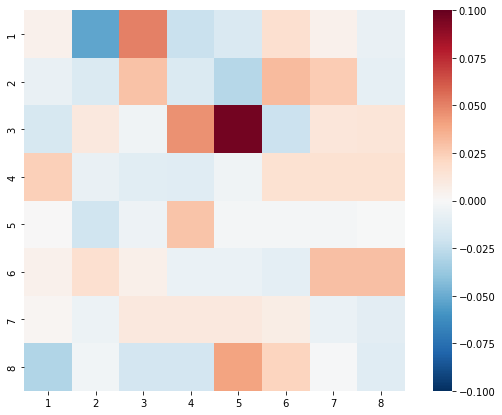

In [12]:
#Creating empty matrices to store the data
plcb_mm_diff_mean = np.zeros((8,8))
plcb_mm_pval = np.zeros((8,8))

#Calculating mean difference and p-value
for i in range(8):
    for j in range(8):
        diff_mean = np.mean(state_transitions_plcb[:,1,i,j] - state_transitions_plcb[:,0,i,j])
        plcb_mm_diff_mean[i,j] = diff_mean
        p_value = permutation_test(state_transitions_plcb[:,1,i,j], state_transitions_plcb[:,0,i,j], method = 'approximate', num_rounds = 10000, seed = 0, paired = True)
        plcb_mm_pval[i,j] = round(p_value, 10)
        
#Plotting statistics
plt.figure(figsize=(10,7))
plcb_ttest = sns.heatmap(plcb_mm_diff_mean, square = True, cmap = "RdBu_r", cbar= True, annot = plcb_mm_pval[:, :], xticklabels = [1,2,3,4,5,6,7,8], yticklabels = [1,2,3,4,5,6,7,8])
plt.savefig(f'Figures/8_states/tp_plcb_run12_annot.png', dpi=300, bbox_inches='tight')

#Plotting statistics
plt.figure(figsize=(10,7))
plcb_ttest = sns.heatmap(plcb_mm_diff_mean, square = True, cmap = "RdBu_r", cbar= True, xticklabels = [1,2,3,4,5,6,7,8], yticklabels = [1,2,3,4,5,6,7,8],vmin=-0.1, vmax=0.1)
plt.savefig(f'Figures/8_states/tp_plcb_run12.png', dpi=300, bbox_inches='tight')

### Step 22: Calculating transition probability for LSD session ###

In [5]:
lsd_all = [bs_lsd_run1, bs_lsd_run2]
state_transitions_lsd = np.zeros((bs_lsd_run1.shape[0], 2, states_no, states_no))


for s, bs in enumerate(lsd_all):
    for sub in range(bs.shape[0]):   
            for i in range(states_no):
                for j in range(states_no):
                    count = 0
                    for l in range(bs.shape[1]-1):
                        if bs[sub, l] == i and bs[sub, l+1] == j:
                            count += 1
                            p = count/np.unique(bs[sub, :], return_counts=True)[1][i] #Calculating transition probability
                    state_transitions_lsd[sub, s, i, j] = p

np.save('data/8_states/state_transitions_lsd_1.npy', state_transitions_lsd)

### Step 23: KS-test for transition probability for LSD session run 1 & 2 ###

#### Step 23.1: KS-test transition probability LSD session run 1 ####

KS-test for transition probability, LSD session, run 1: statistics 0.2968227755633068, p-value 1.7797695284277966e-60


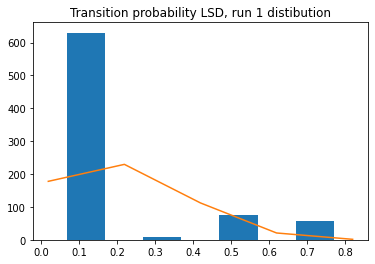

In [46]:
lsd_run1 = state_transitions_lsd[:,0,:,:]

l1_trans1 = np.concatenate(lsd_run1, axis = 0)
lsd1 = np.concatenate(l1_trans1, axis = 0)

l1_loc, l1_scale = norm.fit(lsd1)
n1 = norm(loc=l1_loc, scale=l1_scale)
l1_stat, l1_pval = kstest(lsd1, n1.cdf)
print(f'KS-test for transition probability, LSD session, run 1: statistics {l1_stat}, p-value {l1_pval}')

plt.hist(lsd1, bins=np.arange(lsd1.min(), lsd1.max()+0.2, 0.2), rwidth=0.5)
l1_x = np.arange(lsd1.min(), lsd1.max()+0.2, 0.2)
plt.plot(l1_x, 120*n1.pdf(l1_x))
plt.title('Transition probability LSD, run 1 distibution')
plt.show()

#### Step 23.2: KS-test transition probability LSD session run 2 #####

KS-test for transition probability, LSD session, run 2: statistics 0.27739014653252914, p-value 9.776644640540421e-53


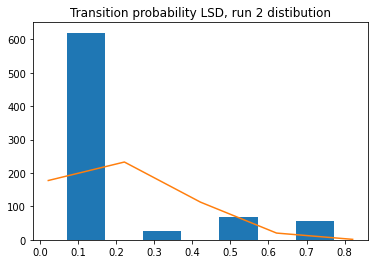

In [47]:
lsd_run2 = state_transitions_lsd[:,1,:,:]

l2_trans1 = np.concatenate(lsd_run2, axis = 0)
lsd2 = np.concatenate(l2_trans1, axis = 0)

l2_loc, l2_scale = norm.fit(lsd2)
n2 = norm(loc=l2_loc, scale=l2_scale)
l2_stat, l2_pval = kstest(lsd2, n2.cdf)
print(f'KS-test for transition probability, LSD session, run 2: statistics {l2_stat}, p-value {l2_pval}')

plt.hist(lsd2, bins=np.arange(lsd2.min(), lsd2.max()+0.2, 0.2), rwidth=0.5)
l2_x = np.arange(lsd2.min(), lsd2.max()+0.2, 0.2)
plt.plot(l2_x, 120*n2.pdf(l2_x))
plt.title('Transition probability LSD, run 2 distibution')
plt.show()

### Step 24: Performing permutation test for LSD session between run 1 and run 2 ###

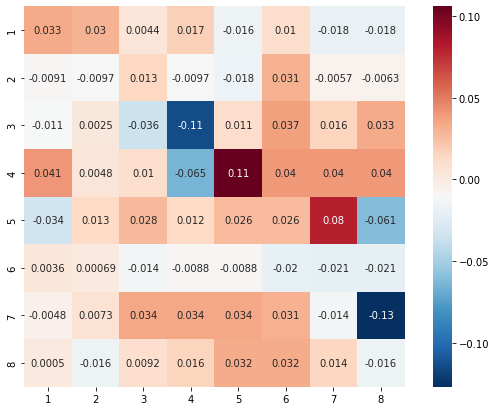

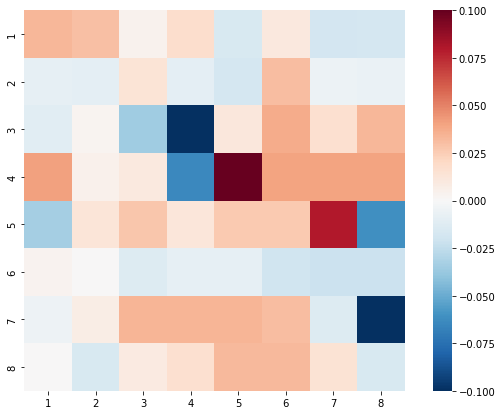

In [13]:
#Creating empty matrices to store the data
lsd_mm_diff_mean = np.zeros((8,8))
lsd_mm_pval = np.zeros((8,8))

#Calculating mean difference and p-value
for i in range(8):
    for j in range(8):
        diff_mean = np.mean(state_transitions_lsd[:,1,i,j] - state_transitions_lsd[:,0,i,j])
        lsd_mm_diff_mean[i,j] = diff_mean
        p_value = permutation_test(state_transitions_lsd[:,1,i,j], state_transitions_lsd[:,0,i,j], method = 'approximate', num_rounds = 10000, seed = 0, paired = True)
        lsd_mm_pval[i,j] = round(p_value, 10)
        
#Plotting statistics
plt.figure(figsize=(10,7))
lsd_ttest = sns.heatmap(lsd_mm_diff_mean, square = True, cmap = "RdBu_r", cbar= True, annot = lsd_mm_diff_mean[:, :], xticklabels = [1,2,3,4,5,6,7,8], yticklabels = [1,2,3,4,5,6,7,8])
plt.savefig(f'Figures/8_states/tp_lsd_run12_annot.png', dpi=300, bbox_inches='tight')

#Plotting statistics
plt.figure(figsize=(10,7))
lsd_ttest = sns.heatmap(lsd_mm_diff_mean, square = True, cmap = "RdBu_r", cbar= True, xticklabels = [1,2,3,4,5,6,7,8], yticklabels = [1,2,3,4,5,6,7,8], vmin=-0.1, vmax=0.1)
plt.savefig(f'Figures/8_states/tp_lsd_run12.png', dpi=300, bbox_inches='tight')

### Step 25: Performing permutation for run 2 between LSD and placebo session ###

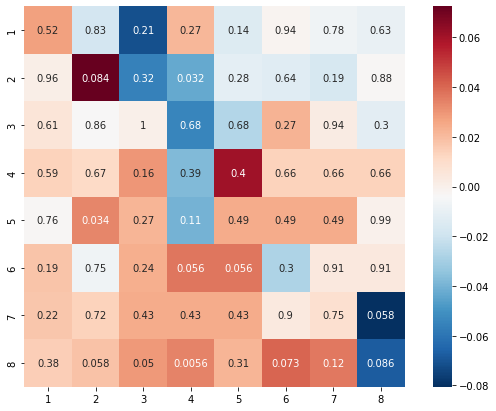

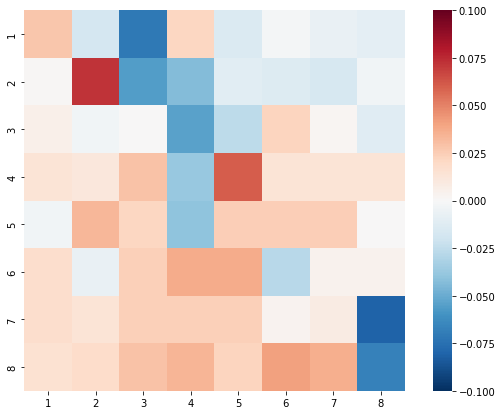

In [8]:
#Creating empty matrices to store the data
run2_mm_diff_mean = np.zeros((8,8))
run2_mm_pval = np.zeros((8,8))

#Calculating mean difference and p-value
for i in range(8):
    for j in range(8):
        diff_mean = np.mean(state_transitions_lsd[:,1,i,j] - state_transitions_plcb[:,1,i,j])
        run2_mm_diff_mean[i,j] = diff_mean
        p_value = permutation_test(state_transitions_lsd[:,1,i,j], state_transitions_plcb[:,1,i,j], method = 'approximate', num_rounds = 10000, seed = 0, paired = True)
        run2_mm_pval[i,j] = round(p_value, 10)
        
#Plotting statistics
plt.figure(figsize=(10,7))
run2_ttest = sns.heatmap(run2_mm_diff_mean, square = True, cmap = "RdBu_r", cbar= True, annot = run2_mm_pval[:, :], xticklabels = [1,2,3,4,5,6,7,8], yticklabels = [1,2,3,4,5,6,7,8])
plt.savefig(f'Figures/8_states/tp_lsd-plcb_run2_annot.png', dpi=300, bbox_inches='tight')

#Plotting statistics
plt.figure(figsize=(10,7))
run2_ttest = sns.heatmap(run2_mm_diff_mean, square = True, cmap = "RdBu_r", cbar= True, xticklabels = [1,2,3,4,5,6,7,8], yticklabels = [1,2,3,4,5,6,7,8],vmin=-0.1, vmax=0.1)
plt.savefig(f'Figures/8_states/tp_lsd-plcb_run2.png', dpi=300, bbox_inches='tight')

### Step 26: Performing permutation test for differences in both sessions between run 2 and run 1 ###

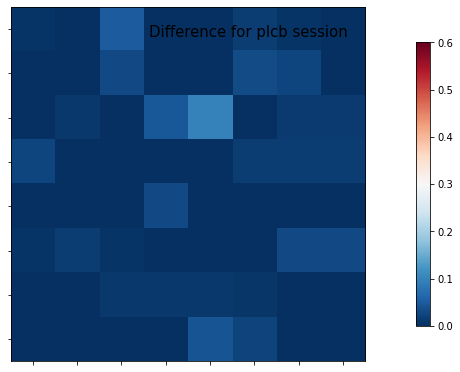

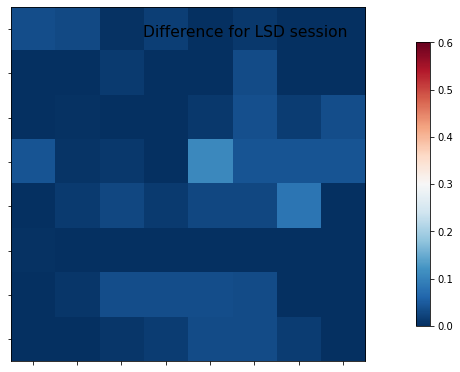

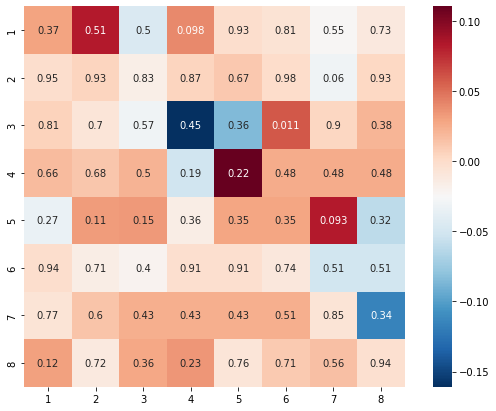

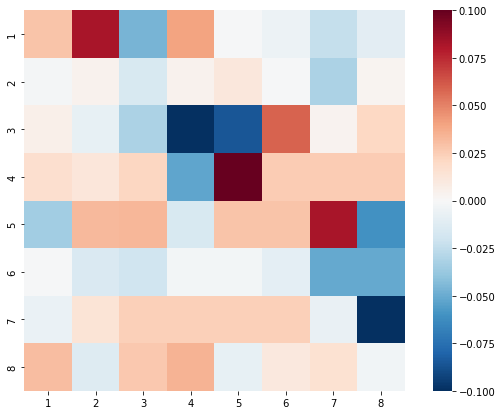

In [10]:
#Calculating difference for placebo session
plcb_difference = state_transitions_plcb[:,1,:,:] - state_transitions_plcb[:,0,:,:]

#Calculating difference for LSD session
lsd_difference = state_transitions_lsd[:,1,:,:] - state_transitions_lsd[:,0,:,:]


plot_matrix(plcb_difference.mean(axis=0), title = 'Difference for plcb session', vmin = 0.0, vmax=0.6)
plot_matrix(lsd_difference.mean(axis=0), title = 'Difference for LSD session', vmin = 0.0, vmax=0.6)

#Creating empty matrices to store the data
diff_mm_diff_mean = np.zeros((8,8))
diff_mm_pval = np.zeros((8,8))

#Calculating mean difference and p-value
for i in range(8):
    for j in range(8):
        diff_mean = np.mean(lsd_difference[:,i,j] - plcb_difference[:,i,j])
        diff_mm_diff_mean[i,j] = diff_mean
        p_value = permutation_test(lsd_difference[:,i,j], plcb_difference[:,i,j], method = 'approximate', num_rounds = 10000, seed = 0, paired = True)
        diff_mm_pval[i,j] = round(p_value, 10)

#Plotting statistics
plt.figure(figsize=(10,7))
diff_ttest = sns.heatmap(diff_mm_diff_mean, square = True, cmap = "RdBu_r", cbar= True, annot = diff_mm_pval[:, :], xticklabels = [1,2,3,4,5,6,7,8], yticklabels = [1,2,3,4,5,6,7,8])
plt.savefig(f'Figures/8_states/tp_lsd-plcb_diff_run12_annot.png', dpi=300, bbox_inches='tight')

#Plotting statistics
plt.figure(figsize=(10,7))
diff_ttest = sns.heatmap(diff_mm_diff_mean, square = True, cmap = "RdBu_r", cbar= True, xticklabels = [1,2,3,4,5,6,7,8], yticklabels = [1,2,3,4,5,6,7,8],vmin=-0.1, vmax=0.1)
plt.savefig(f'Figures/8_states/tp_lsd-plcb_diff_run12.png', dpi=300, bbox_inches='tight')